# Titanic Dataset

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 2: Upload and Load the Dataset

In [4]:
uploaded = files.upload()

# Confirm upload
os.listdir()

Saving cleaned_titanic_data.csv to cleaned_titanic_data (1).csv


['.config',
 'cleaned_titanic_data.csv',
 'cleaned_titanic_data (1).csv',
 'sample_data']

In [5]:
# Load data
titanic = pd.read_csv('cleaned_titanic_data.csv')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


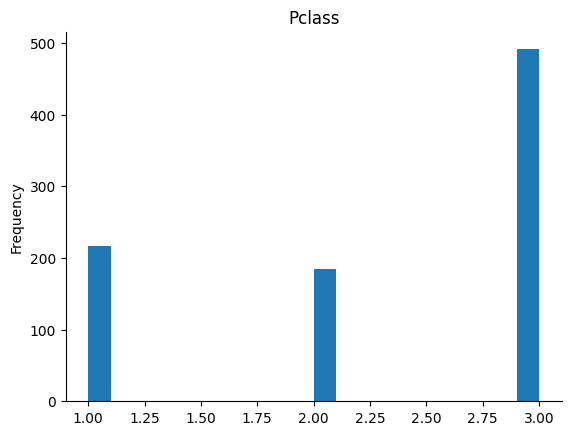

In [9]:
# @title Pclass

from matplotlib import pyplot as plt
titanic['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

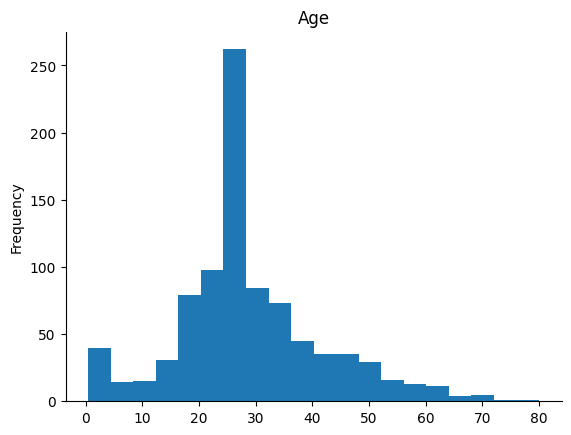

In [8]:
# @title Age

from matplotlib import pyplot as plt
titanic['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

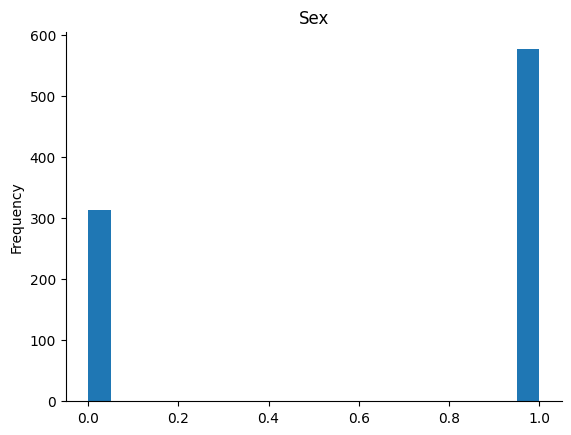

In [7]:
# @title Sex

from matplotlib import pyplot as plt
titanic['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Step 3: Preprocessing

In [10]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


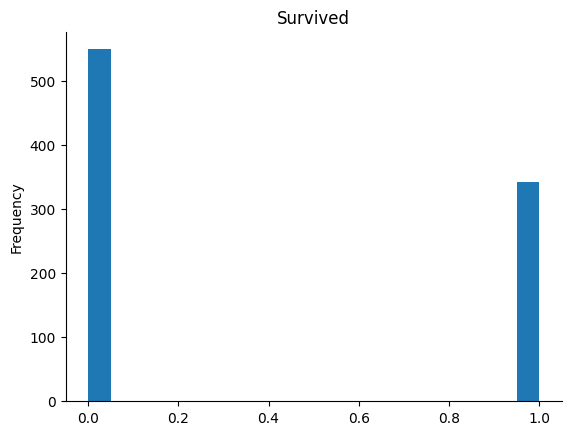

In [12]:
# @title Survived
from matplotlib import pyplot as plt
titanic['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
# Separate features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [14]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Logistic Regression Model

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Predict
y_pred = logreg.predict(X_test)

# Step 5: Model Evaluation

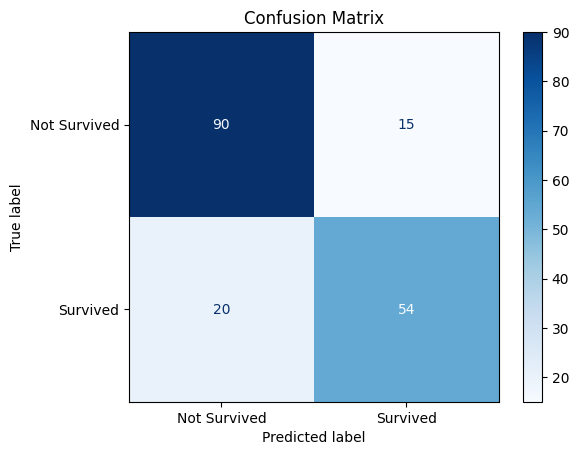

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Summary of Findings

- The confusion matrix showed how well the model distinguished between survivors and non-survivors
- The classification report provided precision, recall, and F1-score for each class.
- Overall performance can be evaluated from metrics like accuracy, recall for survivors, and balance in precision-recall tradeoff